In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od

od.download("https://www.kaggle.com/datasets/baltacifatih/turkish-lira-banknote-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: syedosamaalishah092
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/baltacifatih/turkish-lira-banknote-dataset


100%|██████████| 3.50G/3.50G [00:36<00:00, 103MB/s]


In [3]:
import cv2
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [4]:
labels = ['5','10','20','50','100','200']
img_path="/content/turkish-lira-banknote-dataset/"

In [5]:
img_list=[]
label_list=[]
for label in labels:
    for img_file in os.listdir(img_path+label):
        img_list.append(img_path+label+'/'+img_file)
        label_list.append(label)

In [6]:
df=pd.DataFrame({'path':img_list,'label':label_list})
df.head()

,path,label
0,/content/turkish-lira-banknote-dataset/5/saltA...,5
1,/content/turkish-lira-banknote-dataset/5/5_1_0...,5
2,/content/turkish-lira-banknote-dataset/5/5_1_0...,5
3,/content/turkish-lira-banknote-dataset/5/saltA...,5
4,/content/turkish-lira-banknote-dataset/5/saltA...,5


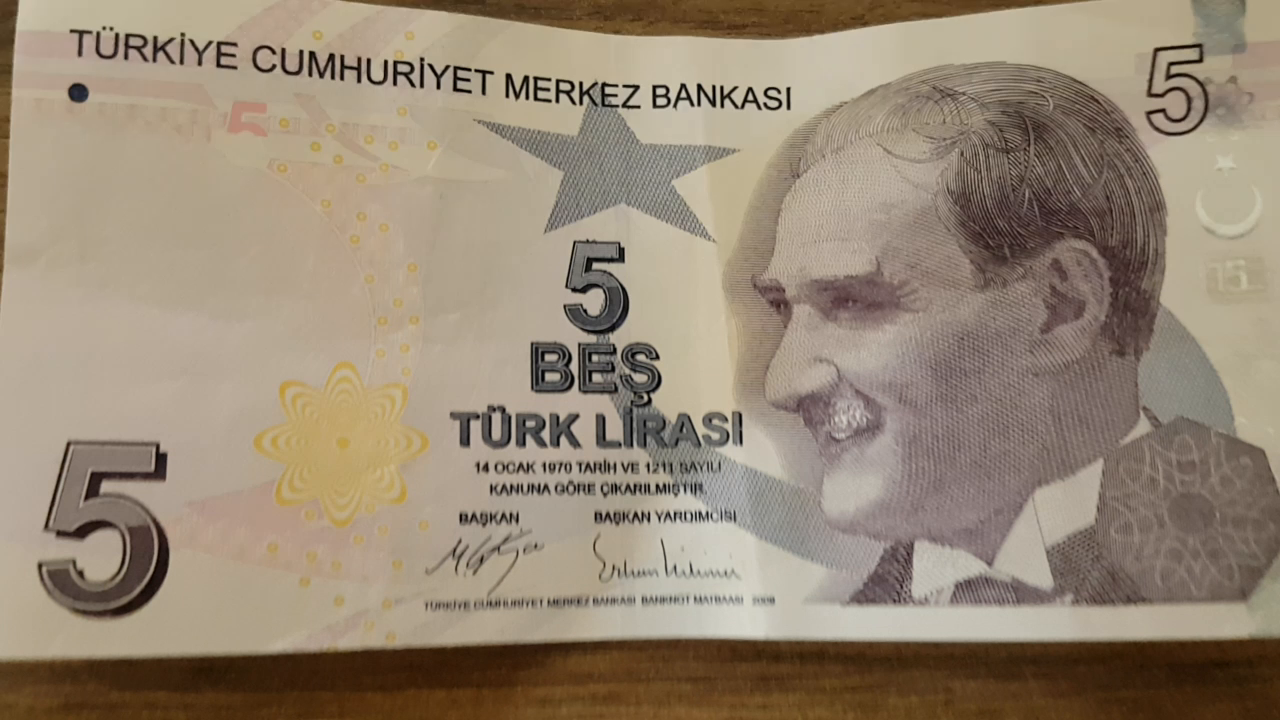

In [8]:
from PIL import Image
img = Image.open('/content/turkish-lira-banknote-dataset/5/5_1_0001.png')
img

In [9]:
df.sample(5)

,path,label
5332,/content/turkish-lira-banknote-dataset/200/emi...,200
2143,/content/turkish-lira-banknote-dataset/20/20_2...,20
1983,/content/turkish-lira-banknote-dataset/10/10_1...,10
3587,/content/turkish-lira-banknote-dataset/50/50_1...,50
5716,/content/turkish-lira-banknote-dataset/200/200...,200


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    6000 non-null   object
 1   label   6000 non-null   object
dtypes: object(2)
memory usage: 93.9+ KB


In [11]:
d = {'5':0,'10':1,'20':2,'50':3,'100':4,'200':5}

In [12]:
df['encode_label']=df['label'].map(d)
#df.label.replace()
df

,path,label,encode_label
0,/content/turkish-lira-banknote-dataset/5/saltA...,5,0
1,/content/turkish-lira-banknote-dataset/5/5_1_0...,5,0
2,/content/turkish-lira-banknote-dataset/5/5_1_0...,5,0
3,/content/turkish-lira-banknote-dataset/5/saltA...,5,0
4,/content/turkish-lira-banknote-dataset/5/saltA...,5,0
...,...,...,...
5995,/content/turkish-lira-banknote-dataset/200/sal...,200,5
5996,/content/turkish-lira-banknote-dataset/200/fli...,200,5
5997,/content/turkish-lira-banknote-dataset/200/fli...,200,5
5998,/content/turkish-lira-banknote-dataset/200/sal...,200,5


<Axes: xlabel='label'>

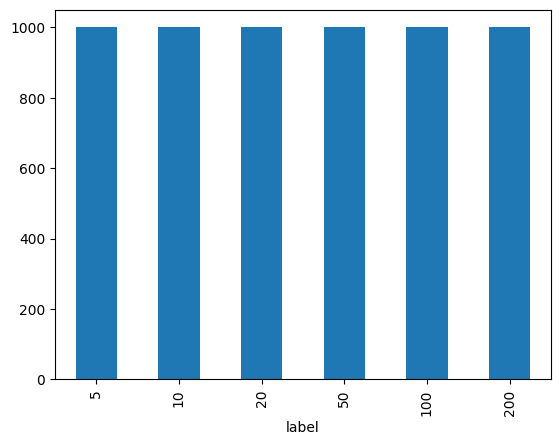

In [13]:
df['label'].value_counts().plot(kind='bar')

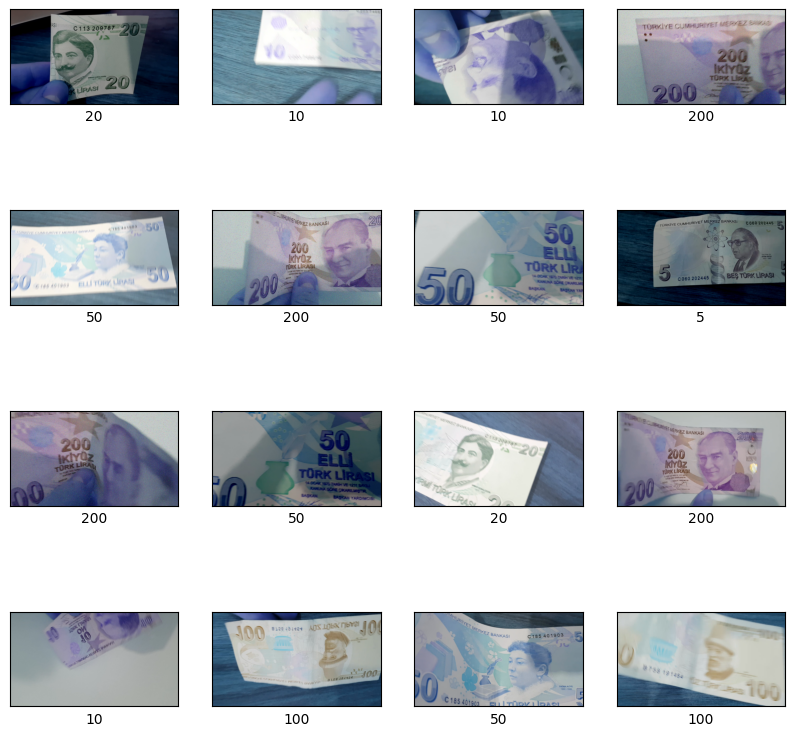

In [14]:
fig, ax = plt.subplots(4,4,figsize=(10,10))
df_sample=df.sample(16)
for i, axi  in enumerate(ax.flat):
    axi.imshow(cv2.imread(str(df_sample['path'].iloc[i])))
    axi.set(xticks=[],yticks=[],xlabel=df_sample['label'].iloc[i])

In [15]:
X=[]
for img in df['path']:
    img=cv2.imread(img)
    img=cv2.resize(img,(30,30))
    img=img/255.0
    X.append(img)

In [16]:
X=np.array(X)

In [17]:
'''def img_preprocessing(df):
    for img in df:
        img=cv2.imread(img)
        img=cv2.resize(img,(30,30))
        img=img/255.0
        X.append(img)
        return X'''

'def img_preprocessing(df):\n    for img in df:\n        img=cv2.imread(img)\n        img=cv2.resize(img,(30,30))\n        img=img/255.0\n        X.append(img)\n        return X'

In [18]:
y=df['encode_label']

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Input(shape=(30, 30, 3)))

model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1)

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 15, 15, 64)        36928     
                                                        

In [21]:
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test), # validation_split=0.2,
                    epochs=10,
                    callbacks=[early_stopping],
                    verbose=1)

Epoch 1/10
150/150 [==============================] - 53s 320ms/step - loss: 2.1080 - accuracy: 0.2754 - val_loss: 2.1617 - val_accuracy: 0.2383
Epoch 2/10
150/150 [==============================] - 46s 305ms/step - loss: 1.2955 - accuracy: 0.4481 - val_loss: 1.5175 - val_accuracy: 0.3283
Epoch 3/10
150/150 [==============================] - 76s 505ms/step - loss: 1.2122 - accuracy: 0.4542 - val_loss: 1.4484 - val_accuracy: 0.3825
Epoch 4/10
150/150 [==============================] - 46s 306ms/step - loss: 1.1079 - accuracy: 0.5035 - val_loss: 1.0693 - val_accuracy: 0.4917
Epoch 5/10
150/150 [==============================] - 52s 345ms/step - loss: 0.9320 - accuracy: 0.6031 - val_loss: 0.9800 - val_accuracy: 0.6133
Epoch 6/10
150/150 [==============================] - 58s 388ms/step - loss: 0.6833 - accuracy: 0.7354 - val_loss: 0.4326 - val_accuracy: 0.8467
Epoch 7/10
150/150 [==============================] - 49s 327ms/step - loss: 0.5194 - accuracy: 0.8083 - val_loss: 0.5655 - val_ac

In [22]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
y_pred_proba = model.predict(X_test)

38/38 [==============================] - 3s 71ms/step


In [24]:
y_pred_proba

array([[3.46016511e-02, 8.57601345e-01, 4.73395176e-03, 8.10750425e-02,
        1.08507775e-04, 2.18794085e-02],
       [2.38375815e-05, 2.06277985e-03, 4.17271985e-05, 9.97821152e-01,
        4.87485750e-06, 4.55545378e-05],
       [9.98535812e-01, 1.50497772e-05, 1.11682713e-03, 2.47293319e-05,
        2.43753166e-04, 6.37998382e-05],
       ...,
       [2.89158816e-05, 6.96033203e-06, 9.87471789e-02, 9.84461367e-05,
        9.01112437e-01, 5.98388351e-06],
       [5.13321534e-03, 1.68754684e-03, 7.35496938e-01, 1.00868065e-02,
        4.62370776e-02, 2.01358363e-01],
       [9.46441814e-02, 8.64848077e-01, 4.99853748e-04, 2.70881932e-02,
        3.41720588e-05, 1.28855463e-02]], dtype=float32)

In [25]:
y_pred=np.argmax(y_pred_proba,axis=1)
y_pred

array([1, 3, 0, ..., 4, 2, 1])

In [26]:
df_cm = pd.DataFrame({'Gerçek Değerler':y_test,'Tahmin Edilen Değerler':y_pred})
df_cm

,Gerçek Değerler,Tahmin Edilen Değerler
1782,1,1
3917,3,3
221,0,0
2135,2,2
5224,5,5
...,...,...
2543,2,2
1773,1,2
2846,2,4
5799,5,2


In [27]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))
confusion_matrix(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.91      0.65      0.76       215
           1       0.99      0.50      0.66       222
           2       0.46      0.86      0.60       176
           3       0.83      0.82      0.83       204
           4       0.75      1.00      0.86       189
           5       0.85      0.66      0.74       194

    accuracy                           0.74      1200
   macro avg       0.80      0.75      0.74      1200
weighted avg       0.81      0.74      0.74      1200



array([[140,   0,  70,   2,   3,   0],
       [ 13, 111,  46,  31,   0,  21],
       [  0,   0, 152,   0,  24,   0],
       [  1,   1,  33, 167,   0,   2],
       [  0,   0,   0,   0, 189,   0],
       [  0,   0,  29,   0,  37, 128]])

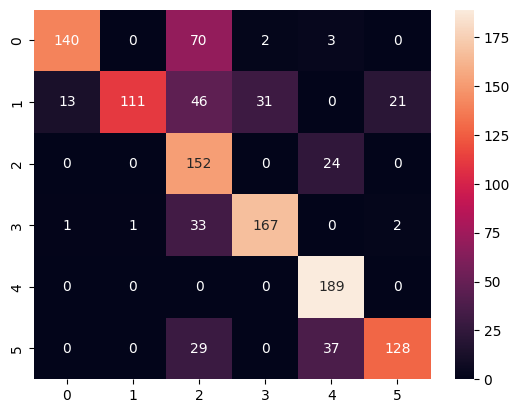

In [28]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')
plt.show()